In [1]:
import pandas as pd

df = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [2]:
#Handling the missing values and coversion of datatype
df.dropna(inplace=True)
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],format='%d/%m/%Y %H:%M:%S')
df.set_index('DateTime', inplace=True)
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'])

In [3]:
#Total and average energy consumed
total_consumption=df['Global_active_power'].sum()
average_consumption=df['Global_active_power'].mean()
print(f'Total={total_consumption},Average={average_consumption}')

Total=2237024.8619999993,Average=1.0916150365006243


In [5]:
#Maximum and minimum energy consumption
maximum_consumption=df['Global_active_power'].max()
minimum_consumption=df['Global_active_power'].min()
print(f"Maximum={maximum_consumption},Minimum={minimum_consumption}")

Maximum=11.122,Minimum=0.076


In [7]:
#Daily,weekly,monthly energy consumption patterns
daily_consumption=df['Global_active_power'].resample('D').sum()
weekly_consumption=df['Global_active_power'].resample('W').sum()
monthly_consumption=df['Global_active_power'].resample('M').sum()


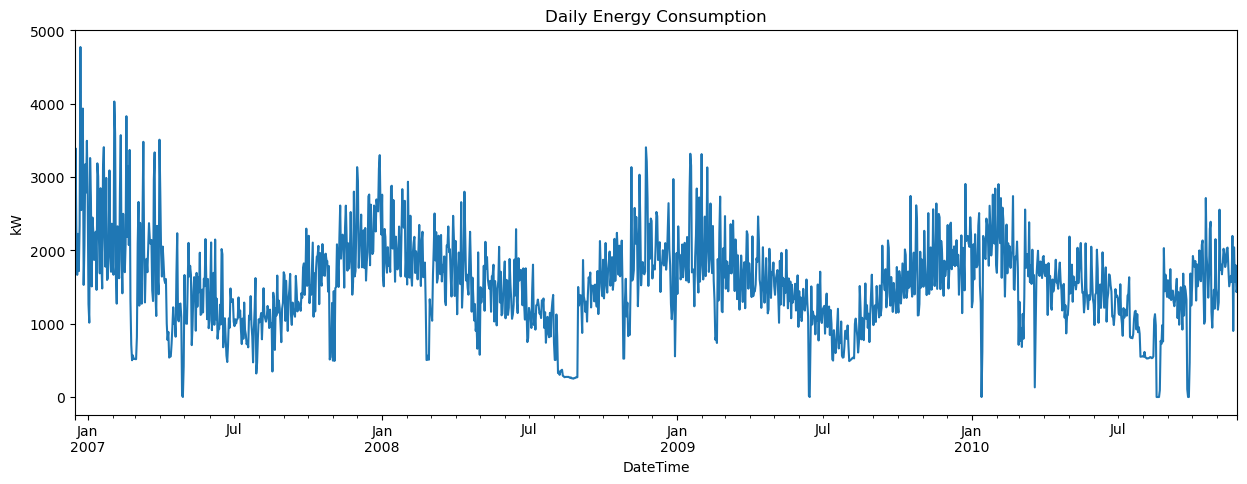

In [8]:
#Daily consumption visual
import matplotlib.pyplot as plt

daily_consumption.plot(figsize=(15,5), title="Daily Energy Consumption")
plt.ylabel("kW")
plt.show()

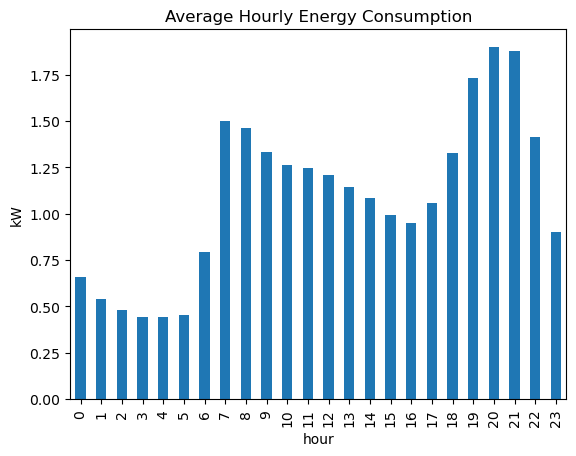

In [9]:
#Peak hours visual
df['hour'] = df.index.hour
hourly_avg = df.groupby('hour')['Global_active_power'].mean()
hourly_avg.plot(kind='bar', title="Average Hourly Energy Consumption")
plt.ylabel("kW")
plt.show()

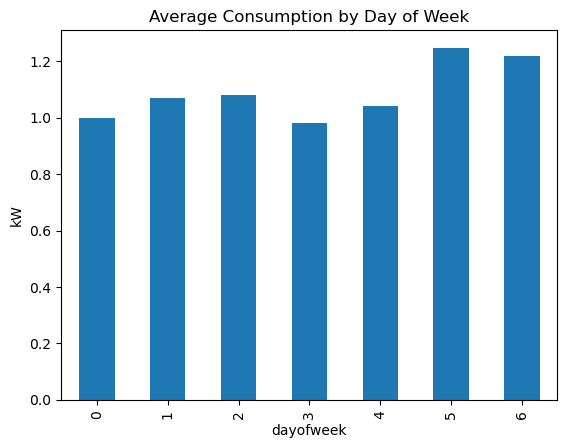

In [11]:
#Which day of the week has the highest average consumption?
df['dayofweek'] = df.index.dayofweek  
weekday_avg = df.groupby('dayofweek')['Global_active_power'].mean()
weekday_avg.plot(kind='bar', title="Average Consumption by Day of Week")
plt.ylabel("kW")
plt.show()

In [12]:
#Is there a correlation between voltage and power consumption?
correlation = df['Global_active_power'].corr(df['Voltage'])
print(f"Correlation: {correlation}")

Correlation: -0.39976160962897517


In [13]:
#Unusually high consumption periods
high_usage = df[df['Global_active_power'] > df['Global_active_power'].quantile(0.99)]
print(high_usage)

                           Date      Time  Global_active_power  \
DateTime                                                         
2006-12-16 17:25:00  16/12/2006  17:25:00                5.360   
2006-12-16 17:26:00  16/12/2006  17:26:00                5.374   
2006-12-16 17:27:00  16/12/2006  17:27:00                5.388   
2006-12-16 17:35:00  16/12/2006  17:35:00                5.412   
2006-12-16 17:36:00  16/12/2006  17:36:00                5.224   
...                         ...       ...                  ...   
2010-11-22 18:48:00  22/11/2010  18:48:00                4.884   
2010-11-24 07:49:00  24/11/2010  07:49:00                4.890   
2010-11-24 07:50:00  24/11/2010  07:50:00                5.172   
2010-11-24 07:51:00  24/11/2010  07:51:00                5.750   
2010-11-25 07:21:00  25/11/2010  07:21:00                5.074   

                     Global_reactive_power  Voltage  Global_intensity  \
DateTime                                                            

In [14]:
#new measure i.e is_weekend
df['is_weekend'] = df['dayofweek'] >= 5

In [15]:
#Saving the cleaned and processed data 
df.to_csv('cleaned_energy_consumption.csv')